__Load Libraries__

In [ ]:
import pandas as pd
from mlxtend.plotting import plot_decision_regions
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:

url = 'https://raw.githubusercontent.com/zahrajalilpour292/workshop_ML/main/diabetes%20(1).csv'
diabete_df = pd.read_csv(url,error_bad_lines=False)

In [ ]:
diabete_df.shape

(768, 9)

In [ ]:

diabete_df.head(10).reset_index(drop=True).style.set_properties(**{'background-color': '#161717','color': '#30c7e6','border-color': '#8b8c8c'})

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
5,5,116,74,0,0,25.600000,0.201000,30,0
6,3,78,50,32,88,31.000000,0.248000,26,1
7,10,115,0,0,0,35.300000,0.134000,29,0
8,2,197,70,45,543,30.500000,0.158000,53,1
9,8,125,96,0,0,0.000000,0.232000,54,1


__The Diabetes data set consists of:__

* Pregnancies: Number of times pregnant
*Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1) 

__Basic Exploratory Data Analysis (EDA) and statistical analysis:__
gives information about the data types,columns, null value counts

In [ ]:
diabete_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:

fig = go.Figure()
for col in diabete_df:
    fig.add_trace(go.Box(x=diabete_df[col], name=col))
fig.update_layout(
    title_text="Box Plot Styling Outliers",
    title_font=dict(color='red', family='newtimeroman', size=25),
    title_x=0.45,
    paper_bgcolor='rgba(0, 0, 0)',
    font=dict(color='#DAF7A6', family='newtimeroman', size=16),
    )
fig.show()

__DataFrame.describe:()__
method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
max tells us the maximum value of that feature.

In [ ]:
diabete_df.describe().T.style.set_properties(**{'background-color': '#161717','color': '#30c7e6','border-color': '#8b8c8c'})

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


__The Question creeping out of this summary?__

Can minimum value of below listed columns be zero (0)?
On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

* Glucose
* BloodPressure
* SkinThickness
* BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

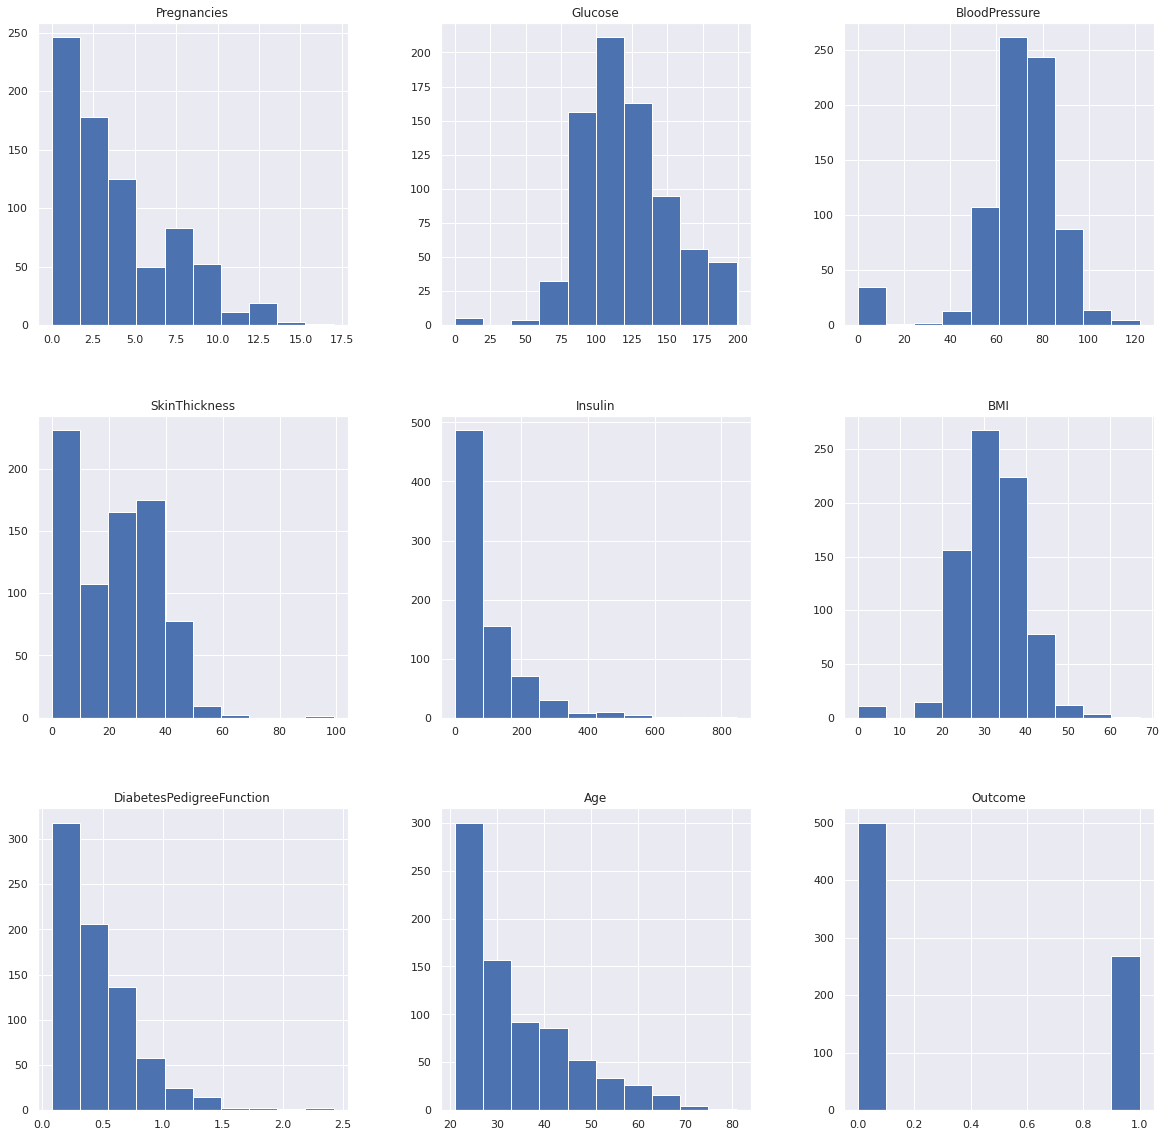

In [ ]:
p = diabete_df.hist(figsize = (20,20))

We have balanced dataset. (35% for Diabete and 65% for non Diabete). If we have imbalanced dat we should use some technique to change it to balanced data set.

In [ ]:
diabetes_data_copy = diabete_df.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


__To fill these Nan values the data distribution needs to be understood__


In [ ]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].mean(), inplace = True)

__check if dataset is balanced__

In [ ]:
colors = ["#0392cf", "#7bc043"]
labels = ['0','1']
values = diabete_df['Outcome'].value_counts()/diabete_df['Outcome'].shape[0]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()

We have balanced dataset. (35% for Diabete and 65% for non Diabete). If we have imbalanced dat we should use some technique to change it to balanced data set.


__correlation Matrix__

__Pearson's Correlation Coefficient:__ helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

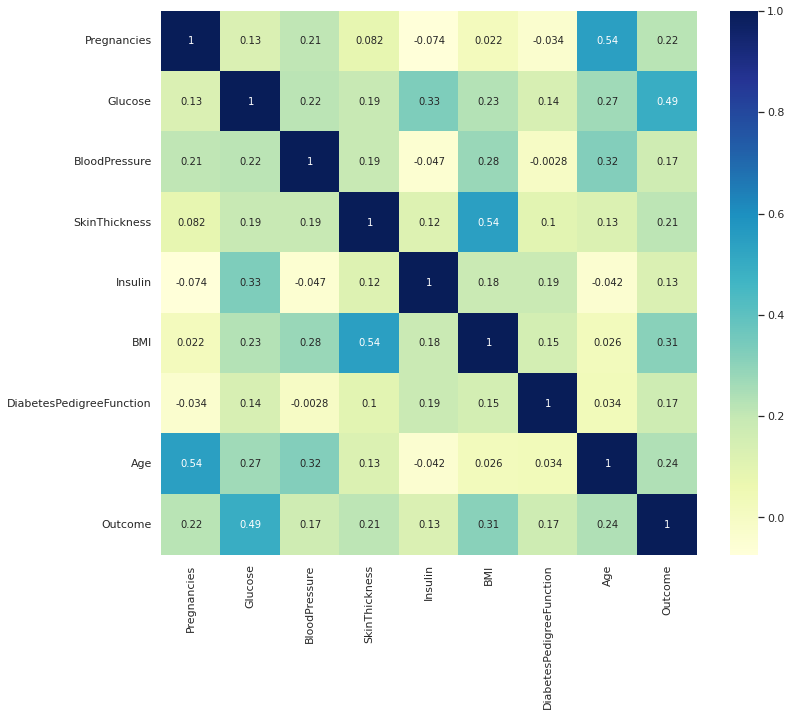

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ="YlGnBu")  # seaborn has very simple solution for heatmap

__Scaling data__

In [ ]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

to learn more about scaling data:

https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

In [ ]:
X.head(10).style.set_properties(**{'background-color': '#161717','color': '#30c7e6','border-color': '#8b8c8c'})

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.692891,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.692891,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.692891,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,0.123302,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.765836,1.548980,5.484909,-0.020496
5,0.342981,-0.186965,0.131929,-0.012301,-0.692891,-0.998077,-0.818079,-0.275760
6,-0.250952,-1.436303,-1.853434,0.329171,0.071204,-0.212128,-0.676133,-0.616111
7,1.827813,-0.219843,0.000000,-0.012301,-0.692891,0.413720,-1.020427,-0.360847
8,-0.547919,2.476096,-0.198965,1.808882,4.021922,-0.284901,-0.947944,1.681259
9,1.233880,0.108930,1.951845,-0.012301,-0.692891,0.000000,-0.724455,1.766346


In [ ]:
y = diabetes_data_copy.Outcome

In [ ]:
#importing train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 78.125 % and k = [9]


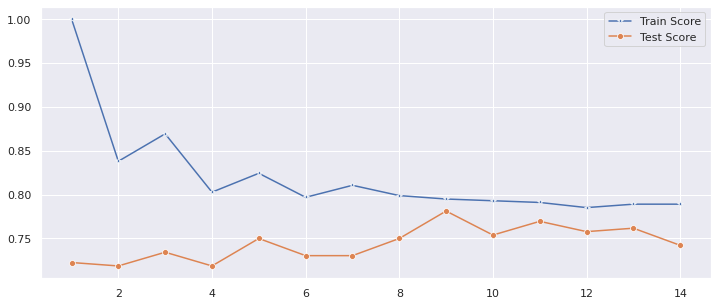

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')


In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(9)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.78125

Text(0.5, 12.5, 'Predicted label')

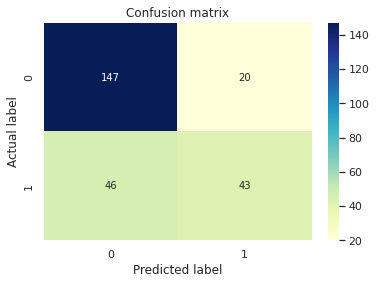

In [ ]:
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       167
           1       0.68      0.48      0.57        89

    accuracy                           0.74       256
   macro avg       0.72      0.68      0.69       256
weighted avg       0.73      0.74      0.73       256



In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

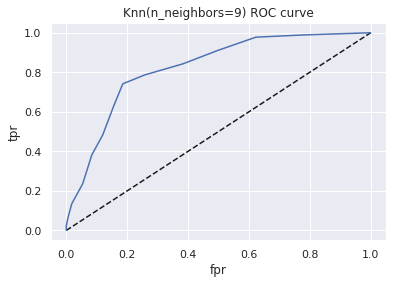

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=9) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_proba)

0.8225459193971607

In [ ]:
#import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))



Best Score:0.7734912146676851
Best Parameters: {'n_neighbors': 27}


GridSearch trains the model multiple times with different hyperparameters, which could increase the chance of overfitting.